Approach:

1. stricte equal: all common value equal... ?
2. field based: if (year, title) equal, journal, authors

In [70]:
import crossrefexp as exp

In [71]:
store = exp.MetaDataStore('data/bee.pickle')

429 metadata loaded from `data/bee.pickle`


growth achieved - 30 nodes in the graph. The last generation number is 1.
growth achieved - 429 nodes in the graph. The last generation number is 2.
graphs/Meikle2018_gen2_top20.svg  saved


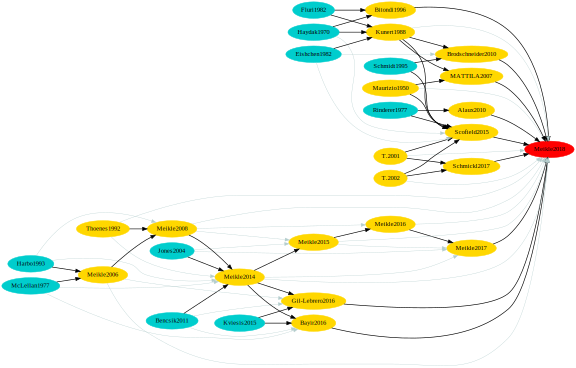

In [72]:
doi = '10.1371/journal.pone.0197589'

# Build the graph and everything:
gr = store.get_refgraphviz( doi, gen=2, top=20, draw_secondary_links=True )
gr

In [73]:
refs_without_doi = []

for metadata in iter( store.values() ):
    
    refs_without_doi.extend( [ref for ref in metadata.get('reference', []) 
                        if "DOI" not in ref] )
    
print(len(refs_without_doi))

4001


In [77]:
refs_without_doi[:3]

[{'first-page': '689',
  'journal-title': 'Am. Bee J.',
  'key': 'Boecking1994',
  'volume': '134',
  'year': '1994'},
 {'first-page': '141',
  'journal-title': 'Apidologie',
  'key': 'Boecking1999',
  'volume': '30',
  'year': '1999'},
 {'first-page': '101',
  'journal-title': 'J. Invertebr. Pathol.',
  'key': 'Bowen-Walker1999',
  'volume': '73',
  'year': '1999'}]

In [81]:
def strict_merge(dictA, dictB):
    common_keys = dictA.keys() & dictB.keys()
    merged_dict = {key:dictA[key] for key in common_keys if dictA[key] == dictB[key]}
    disagree = {key for key in common_keys if dictA[key] != dictB[key]}
    return merged_dict, disagree

In [83]:
matches = []

couples = [(i, j) for i in range(len(refs_without_doi)) for j in range(i)]
for i, j in couples:
    merge, disagree = strict_merge(refs_without_doi[i], refs_without_doi[j])
    
    if 'year' in disagree:
        continue
    
    if len(merge) > 1:
        matches.append((refs_without_doi[i], refs_without_doi[j], merge))
    
print(len(matches))

3217


In [85]:
matches[:2]

[({'first-page': '111',
   'journal-title': 'Apidologie',
   'key': 'Calis1999',
   'volume': '30',
   'year': '1999'},
  {'first-page': '141',
   'journal-title': 'Apidologie',
   'key': 'Boecking1999',
   'volume': '30',
   'year': '1999'},
  {'journal-title': 'Apidologie', 'volume': '30', 'year': '1999'}),
 ({'first-page': '319',
   'journal-title': 'Apidologie',
   'key': 'Lin2004',
   'volume': '35',
   'year': '2004'},
  {'first-page': '441',
   'journal-title': 'Apidologie',
   'key': 'Chen2004',
   'volume': '35',
   'year': '2004'},
  {'journal-title': 'Apidologie', 'volume': '35', 'year': '2004'})]

In [86]:
' '.join(matches[0][0].values())

'Apidologie Calis1999 1999 30 111'